# <Span style="color:#134f5c"> TRIDENT1 - Modele - Kwiecień 2020 [''kliki_uczenie'']
 

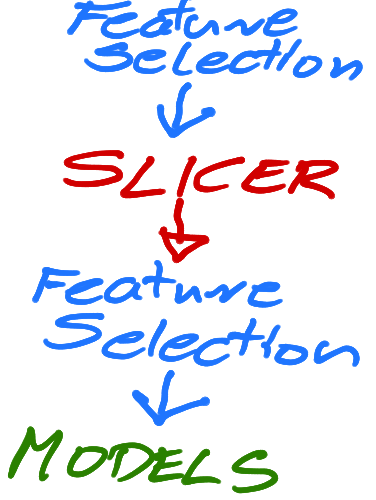

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/7/RESULT_20.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(59857, 22)

Index(['Unnamed: 0', 'total_person_income', 'num_persons_worked_for_employer',
       'state_of_previous_residence', 'full_or_part_time_employment_stat',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'federal_income_tax_liability', 'major_industry_code',
       'major_occupation_code', 'marital_status', 'age', 'industry_code',
       'country_of_birth_father', 'detailed_household_summary_in_household',
       'adjusted_gross_income', 'own_business_or_self_employed',
       'class_of_worker', 'education', 'citizenship',
       'fill_inc_questionnaire_for_veterans_admin', 'divdends_from_stocks'],
      dtype='object')


,Unnamed: 0,total_person_income,num_persons_worked_for_employer,state_of_previous_residence,full_or_part_time_employment_stat,detailed_household_and_family_stat,migration_prev_res_in_sunbelt,federal_income_tax_liability,major_industry_code,major_occupation_code,...,industry_code,country_of_birth_father,detailed_household_summary_in_household,adjusted_gross_income,own_business_or_self_employed,class_of_worker,education,citizenship,fill_inc_questionnaire_for_veterans_admin,divdends_from_stocks
0,168643,0,0,8,0,2,0,4,14,6,...,0,40,4364.62,0,0,3,10,1,0,0
1,190065,2,4,33,0,7,0,2,14,6,...,0,26,504.63,0,0,3,12,1,0,0
2,3804,2,4,30,6,5,3,0,2,7,...,37,40,2592.88,31,30,4,5,1,0,0


### <span style="color:green"> Kasuje bezsensowne kolumny

In [2]:
del df['Unnamed: 0']
# del df['Unnamed: 0.1']

### <span style="color:green"> Wielkość bazy df jest ogromna - wyciągam tylko 100% losowo wybranych rekordów</span> 
Taka metoda jest najbardziej reprezentatywna i oszczędza zasoby komputera.

In [3]:
df2 = df.sample(frac = 1.0, random_state=10)
df2.shape

(59857, 21)

## <span style="color:green"> Wyświetlenie braków </span>  (własnej roboty)

In [4]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df2.columns[i]
    r = df2[i].isnull().sum()
    h = df2[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


## <span style="color:green"> Nie warto kasować rekordów z brakami tylko warto wstawiać tam wartości z poza zakresu </span>

Wyszukuje tylko puste rekordy

In [5]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

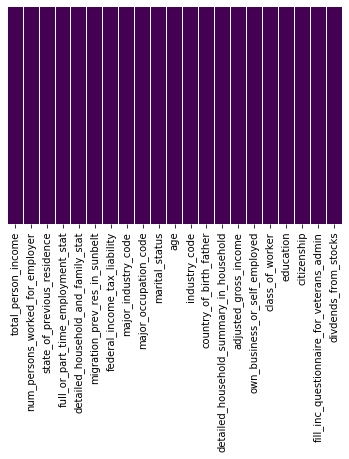

In [6]:
import seaborn as sns

sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Wstawia w puste miejsca wartości z poza zakresu

In [7]:
df2.fillna(7777, inplace=True)

## <span style="color:green"> Przegląd danych pod kontem formatu i ilości wartości unikalnych</span>  (własnej roboty)

In [8]:
a,b = df2.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df2.columns[i]
    h = df2[i].nunique()
    f = df2[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

int64 ---nunique-> 5 ---name-> num_persons_worked_for_employer
int64 ---nunique-> 34 ---name-> state_of_previous_residence
int64 ---nunique-> 8 ---name-> full_or_part_time_employment_stat
int64 ---nunique-> 8 ---name-> detailed_household_and_family_stat
int64 ---nunique-> 7 ---name-> migration_prev_res_in_sunbelt
int64 ---nunique-> 6 ---name-> federal_income_tax_liability
int64 ---nunique-> 24 ---name-> major_industry_code
int64 ---nunique-> 15 ---name-> major_occupation_code
int64 ---nunique-> 7 ---name-> marital_status
int64 ---nunique-> 91 ---name-> age
int64 ---nunique-> 51 ---name-> industry_code
int64 ---nunique-> 43 ---name-> country_of_birth_father
float64 ---nunique-> 44301 ---name-> detailed_household_summary_in_household
int64 ---nunique-> 47 ---name-> adjusted_gross_income
int64 ---nunique-> 53 ---name-> own_business_or_self_employed
int64 ---nunique-> 9 ---name-> class_of_worker
int64 ---nunique-> 17 ---name-> education
int64 ---nunique-> 3 ---name-> citizenship
int64 ---n

## <span style="color:green"> Które z tych funkcji są kategoryczne?</span> (własnej roboty)

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 10 unikalnych wartości

In [9]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    h = df2[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
num_persons_worked_for_employer --- int64 --- 5
full_or_part_time_employment_stat --- int64 --- 8
detailed_household_and_family_stat --- int64 --- 8
migration_prev_res_in_sunbelt --- int64 --- 7
federal_income_tax_liability --- int64 --- 6
marital_status --- int64 --- 7
class_of_worker --- int64 --- 9
citizenship --- int64 --- 3
fill_inc_questionnaire_for_veterans_admin --- int64 --- 2


#### Potrzebujemy listy z numerami kolumnaby użyć jej w CatBoost¶

In [10]:
import numpy as np
a,b = df2.shape     #<- ile mamy kolumn
b

print()
categorical_fun = np.where((df2.dtypes == np.object)|(df2.nunique() <= 15))[0]
x1 = len(categorical_fun)
print('categorical_fun: ',x1)
print('categorical_fun: ',categorical_fun)
print()
numerical_fun = np.where((df2.dtypes != np.object)&(df2.nunique() > 15))[0]
x2 = len(numerical_fun)
print('numerical_fun: ',x2)
print('numerical_fun: ',numerical_fun)
print()
print('LICZBA KOLUMN MA SIĘ ZGADZAĆ!')
print('all columns:                     ',b)
print('numerical_fun + categorical_fun: ',x1+x2)


categorical_fun:  11
categorical_fun:  [ 0  1  3  4  5  6  8  9 16 18 19]

numerical_fun:  10
numerical_fun:  [ 2  7 10 11 12 13 14 15 17 20]

LICZBA KOLUMN MA SIĘ ZGADZAĆ!
all columns:                      21
numerical_fun + categorical_fun:  21


## <span style="color:red"> Uwaga! 
#### <span style="color:red">    1. dane categorialne nie muszą mieć tylko formatu tekstowego, 

#### <span style="color:red">    2. dane tekstowe trzeba przerobić do formatu numerycznego 

### <span style="color:green"> Narzędzie do automatycznego kodowania zmiennych dyskretnych </span>(własnej roboty)


In [11]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df2[i] = pd.Categorical(df2[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------


### <span style="color:green"> Narzędzie do automatycznej zmiany znaku na plus </span>(własnej roboty)

In [12]:
df2.head()

,total_person_income,num_persons_worked_for_employer,state_of_previous_residence,full_or_part_time_employment_stat,detailed_household_and_family_stat,migration_prev_res_in_sunbelt,federal_income_tax_liability,major_industry_code,major_occupation_code,marital_status,...,industry_code,country_of_birth_father,detailed_household_summary_in_household,adjusted_gross_income,own_business_or_self_employed,class_of_worker,education,citizenship,fill_inc_questionnaire_for_veterans_admin,divdends_from_stocks
4367,2,4,17,0,4,0,1,14,6,2,...,0,40,1064.97,0,0,3,12,1,0,1673
19559,2,4,19,1,4,1,5,15,0,4,...,45,40,1668.50,23,52,4,12,1,0,0
24389,2,4,33,0,7,0,2,14,6,2,...,0,40,2116.54,0,0,3,12,1,0,0
12610,2,4,17,0,4,4,2,2,12,2,...,37,40,1893.68,17,42,4,16,1,0,500
18702,2,4,17,0,4,2,0,21,14,4,...,29,40,920.70,38,52,4,12,1,0,0


### <span style="color:green">Szukamy ujemnych wartości i je zmieniamy (przesuwamy) aby były dodatnie
Filtr Ch2 nie lubi ujemnych wartości

In [13]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NEGATIVE VALUES')
print('---------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].min()
    if f < 0: 
        print(i,"---",f)

NEGATIVE VALUES
---------------


#### Najpierw trzeba się upewnić czy ujemna wartość to nie jest ewidentny błąd

#### usuwamy wartości ujemne (przesuwamy)

In [14]:
#df2['Age_In_Day'] = df2['Age_In_Day']+(-df2['Age_In_Day'].min())
#df2['cons_conf_idx'] = df2['cons_conf_idx']+(-df2['cons_conf_idx'].min())

### <span style="color:green"> Sprawdzam czy nie ma już zmiennych tekstowych i wartości pustych

In [15]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [16]:
obj = np.where(df2.dtypes == np.object)
obj

(array([], dtype=int64),)

## <span style= "color:green"> Ustawiamy zmienną wynikową (manualnie)

In [17]:
result = 'total_person_income'

In [18]:
X = df2.drop(result, axis=1)
y = df2[result]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [19]:
X_train.columns

Index(['num_persons_worked_for_employer', 'state_of_previous_residence',
       'full_or_part_time_employment_stat',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'federal_income_tax_liability', 'major_industry_code',
       'major_occupation_code', 'marital_status', 'age', 'industry_code',
       'country_of_birth_father', 'detailed_household_summary_in_household',
       'adjusted_gross_income', 'own_business_or_self_employed',
       'class_of_worker', 'education', 'citizenship',
       'fill_inc_questionnaire_for_veterans_admin', 'divdends_from_stocks'],
      dtype='object')

In [20]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    from sklearn.metrics import accuracy_score
    
    import scikitplot as skplt
    from plot_metric.functions import BinaryClassification
    from sklearn.metrics import precision_recall_curve

       
    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print('Valuation for test data only:')
    print(classification_report(ytest, model.predict(Xtest)))
    
    ## ----------AUC-----------------------------------------
     
    print('---------------------') 
    AUC_train_1 = metrics.roc_auc_score(ytrain,model.predict_proba(Xtrain)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(ytest,model.predict_proba(Xtest)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print('---------------------')    
    
    print("Accuracy Training data:     ", np.round(accuracy_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Accuracy Test data:         ", np.round(accuracy_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("----------------------------------------------------------------------")
    print('Valuation for test data only:')

    y_probas1 = model.predict_proba(Xtest)[:,1]
    y_probas2 = model.predict_proba(Xtest)

### ---plot_roc_curve--------------------------------------------------------
    plt.figure(figsize=(13,4))

    plt.subplot(1, 2, 1)
    bc = BinaryClassification(ytest, y_probas1, labels=["Class 1", "Class 2"])
    bc.plot_roc_curve() 


### --------precision_recall_curve------------------------------------------

    plt.subplot(1, 2, 2)
    precision, recall, thresholds = precision_recall_curve(ytest, y_probas1)

    plt.plot(recall, precision, marker='.', label=model)
    plt.title('Precision recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(-0.30, -0.6))
    plt.show()

## ----------plot_roc-----------------------------------------

    skplt.metrics.plot_roc(ytest, y_probas2)


## <span style="color:green"> Oversampling

In [21]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    
    print("y = 0: ", sum(ytrain == 0))
    print("y = 1: ", sum(ytrain == 1))
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
        
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show
    

y = 0:  11438
y = 1:  483
--------------------------------------------------------

Before oversampling Xtrain:      (47885, 20)
Before oversampling ytrain:      (47885,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (59477, 20)
After oversampling ytrain_OV:   (59477, 1)
--------------------------------------------------------


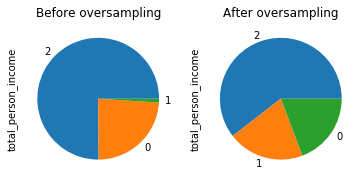

In [22]:
oversampling(y_train, X_train)

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Logistic Regression Model</span>

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Random Forest Classifier</span>

In [23]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon May  4 12:51:11 2020
Measuring the time to complete this task


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 750, 
                                  max_depth = 2, 
                                  min_samples_split = 2, min_samples_leaf = 3) 
rfc = rfc.fit(Xtrain_OV, ytrain_OV)
y_pred_RFC = rfc.predict(X_test)

In [25]:
Time_CV_rfc =((time.time() - start_time)/60) 
Time_CV_rfc = np.round((Time_CV_rfc), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Czas:                                  ',Time_CV_rfc)
Time_CV_rfc_R = np.round((Time_CV_rfc/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_CV_rfc_R)

Czas:                                   0.2288
Time for one record in seconds x 1000:  0.2308


## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Naive Bayes Classifier</span>

In [26]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon May  4 12:51:25 2020
Measuring the time to complete this task


In [27]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(Xtrain_OV, ytrain_OV)

GaussianNB(priors=None, var_smoothing=1e-09)

y_pred_NBC = NBC.predict(X_test)

In [28]:
Time_NBC =((time.time() - start_time)/60) 
Time_NBC = np.round((Time_NBC), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Czas:                                  ',Time_NBC)
Time_NBC_R = np.round((Time_NBC/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_NBC_R)

Czas:                                   0.001
Time for one record in seconds x 1000:  0.001


In [29]:
Classification_Assessment(NBC ,Xtrain_OV, ytrain_OV, X_test, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Support Vector Machines - Gaussian</span>

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Support Vector Machines - linear</span>

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">CatBoost</span>

In [ ]:
## Potrzebujemy listy z numerami kolumn kategorycznych dla CatBoost

import numpy as np
a,b = df.shape     #<- ile mamy kolumn
b

print()
cat_fun2 = np.where(df.dtypes == np.object)[0]    #|(df2.nunique() <= 3)
x1 = len(cat_fun2)
print('cat_fun2: ',x1)
print('cat_fun2: ',cat_fun2)

In [ ]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 148,
    'logging_level': 'Silent',
    'use_best_model': False,
    'od_type': 'Iter',
    'od_wait': 40
}

train_pool = Pool(Xtrain_OV, ytrain_OV, cat_features=cat_fun2)
validate_pool = Pool(X_test, y_test, cat_features=cat_fun2)

CBC = CatBoostClassifier(**params)
CBC.fit(train_pool, eval_set=validate_pool, plot=False)

In [ ]:
Time_CBC =((time.time() - start_time)/60) 
Time_CBC = np.round((Time_CBC), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Time:                                  ',Time_CBC)
Time_CBC_R = np.round((Time_CBC/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_CBC_R)

In [ ]:
Classification_Assessment(CBC ,Xtrain_OV, ytrain_OV, X_test, y_test)

## <span style="color:green"> Ocena modeli

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print('Logistic Regression Model:') 
print('Time in min.: ', Time_LR_Grid)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, LR_Grid.predict(X_test))))
AUC_train_LR_Grid = metrics.roc_auc_score(ytrain_OV,LR_Grid.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_LR_Grid)
AUC_test_LR_Grid = metrics.roc_auc_score(y_test,LR_Grid.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_LR_Grid)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, LR_Grid.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, LR_Grid.predict(X_test)), decimals=4)) 



print('------------------------------------------')
print('Random Forest Classifier:') 
print('Time in min.: ', Time_CV_rfc)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, rfc.predict(X_test))))
AUC_train_rfc = metrics.roc_auc_score(ytrain_OV,rfc.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_rfc)
AUC_test_rfc = metrics.roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_rfc)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, rfc.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, rfc.predict(X_test)), decimals=4)) 



print('------------------------------------------')
print('Naive Bayes Classifier:') 
print('Time in min.: ', Time_NBC)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, NBC.predict(X_test))))
AUC_train_NBC = metrics.roc_auc_score(ytrain_OV,NBC.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_NBC)
AUC_test_NBC = metrics.roc_auc_score(y_test,NBC.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_NBC)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, NBC.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, NBC.predict(X_test)), decimals=4)) 


print('------------------------------------------')
print('CatBoost:') 
print('Time in min.: ', Time_CBC)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, CBC.predict(X_test))))
AUC_train_CBC = metrics.roc_auc_score(ytrain_OV,CBC.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_CBC)
AUC_test_CBC = metrics.roc_auc_score(y_test,CBC.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_CBC)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, CBC.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, CBC.predict(X_test)), decimals=4)) 


# '20'
liczebność: 370 287

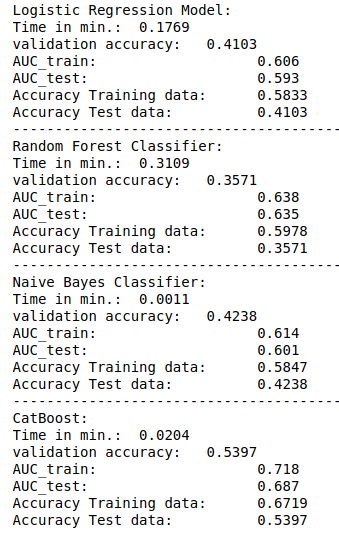

# '10'
liczebność: 370 287

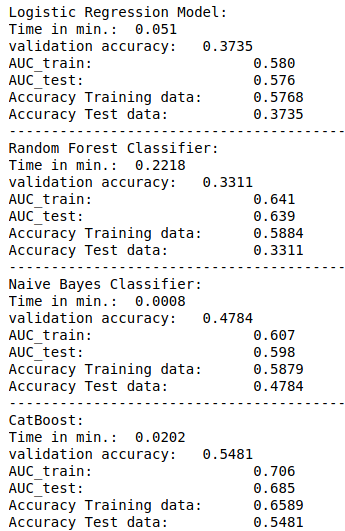

# '40' najlepszy
liczebność: 370 287



liczebność: 370 287 duży zbiór


